

---


- Họ và tên: Mai Xuân Bách
- ID: 11200489
- Lớp: DSEB 62


---








In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch.nn as nn
import torch.optim as optim # optimization algo
import torchvision
from torchvision import datasets, transforms

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import  classification_report, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

# Bài 1:
Cho bài toán XOR. Implement thuật toán neural network để giải bài toán dùng Pytorch


In [4]:
# XOR
X = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
y = torch.Tensor([[0], [1], [1], [0]])

In [5]:
X

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [6]:
y

tensor([[0.],
        [1.],
        [1.],
        [0.]])

In [7]:
# Define neural network
class XORNet(nn.Module): # nn.Module: base class for all PyTorch models
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # Input layer with 2 input neurons and 2 output neurons
        self.fc2 = nn.Linear(2, 1)  # Output layer with 2 input neurons and 1 output neuron

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x)) # Sigmoid act. function
        x = torch.sigmoid(self.fc2(x))
        return x

# Create the neural network and specify the loss function and optimizer
net = XORNet()
criterion = nn.BCELoss() # Binary crossentropy
optimizer = optim.SGD(net.parameters(), lr=0.5) # Stochastic GD, net.parameters: get the parameters to optimize

# Training loop
for epoch in range(10000):
    optimizer.zero_grad() # clear the gradients of the model's parameters
    output = net(X) # forward pass
    loss = criterion(output, y)
    loss.backward() # computes gradients of the loss wrt parameters.
    optimizer.step() # updates the network's weights using the computed gradients.

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item()}")

# Test the trained network
with torch.no_grad(): #  don't need to compute gradients during testing.
    test_input = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
    predictions = net(test_input)
    print("Predictions:")
    for i in range(len(predictions)):
        print(f"Input: {test_input[i].tolist()}, Output: {predictions[i].item()}")


Epoch 0: Loss = 0.7407667636871338
Epoch 1000: Loss = 0.6931676864624023
Epoch 2000: Loss = 0.6931492686271667
Epoch 3000: Loss = 0.6931468844413757
Epoch 4000: Loss = 0.693145751953125
Epoch 5000: Loss = 0.6931425333023071
Epoch 6000: Loss = 0.6931208968162537
Epoch 7000: Loss = 0.692029595375061
Epoch 8000: Loss = 0.06400877237319946
Epoch 9000: Loss = 0.015381977893412113
Predictions:
Input: [0.0, 0.0], Output: 0.008264857344329357
Input: [0.0, 1.0], Output: 0.9925314784049988
Input: [1.0, 0.0], Output: 0.9887452721595764
Input: [1.0, 1.0], Output: 0.007034770678728819


# Bài 2:
Cho dataset MNIST

Implement thuật toán neural network với dữ liệu trên sử dụng Pytorch.

Chỉnh learning rate, vẽ đồ thị loss tương ứng.

Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test.


## Load MNIST data:
In the torchvision dataset - MNIST, dataloader has 60000 images as training set and 10000 images as the test set. Then, training set takes up about 85%. Then I use the default training set and  test set.

In [8]:
# Transform to tensor
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Tải dữ liệu MNIST
train_data = datasets.MNIST('data', train=True, download=True, transform=transform)
test_data = datasets.MNIST('data', train=False, download=True, transform=transform)

# Chia thành tập train và valid
train_size = int(0.8 * len(train_data))
valid_size = len(train_data) - train_size
train_dataset, validation_dataset = torch.utils.data.random_split(train_data, [train_size, valid_size])

# DataLoader cho tập train, tập validation và tập test
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 93370444.12it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 52828475.28it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28736351.04it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2082480.19it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Implement thuật toán neural network với dữ liệu trên sử dụng Pytorch.

In [9]:
# Định nghĩa kiến trúc mạng neural
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Lớp ẩn với 128 đơn vị
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)      # Lớp đầu ra với 10 đơn vị (số lớp đầu ra cho MNIST)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Định dạng lại tensor đầu vào
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## Chỉnh learning rate, vẽ đồ thị loss tương ứng.

### lr = 0.001 (OK)

Epoch:   0 	 Train loss:  0.4096654592851798 	 Valid loss:  0.3137457712375103
Epoch:   1 	 Train loss:  0.2197078254868587 	 Valid loss:  0.22824866586226097
Epoch:   2 	 Train loss:  0.15895123035212358 	 Valid loss:  0.1673091454926799
Epoch:   3 	 Train loss:  0.129038201538225 	 Valid loss:  0.15106978494812676
Epoch:   4 	 Train loss:  0.10685407098568976 	 Valid loss:  0.11906229963704468
Epoch:   5 	 Train loss:  0.09052680600434541 	 Valid loss:  0.12787649372315152
Epoch:   6 	 Train loss:  0.08290289967817564 	 Valid loss:  0.11428598942175666
Epoch:   7 	 Train loss:  0.07135588195547461 	 Valid loss:  0.12502823307852637
Epoch:   8 	 Train loss:  0.06809743303991854 	 Valid loss:  0.1313427836743203
Epoch:   9 	 Train loss:  0.06075155815280353 	 Valid loss:  0.11317857062354922
Epoch:   10 	 Train loss:  0.05236734898698826 	 Valid loss:  0.11574464305204914
Epoch:   11 	 Train loss:  0.04823334617819637 	 Valid loss:  0.10446364923870746
Epoch:   12 	 Train loss:  0.0447

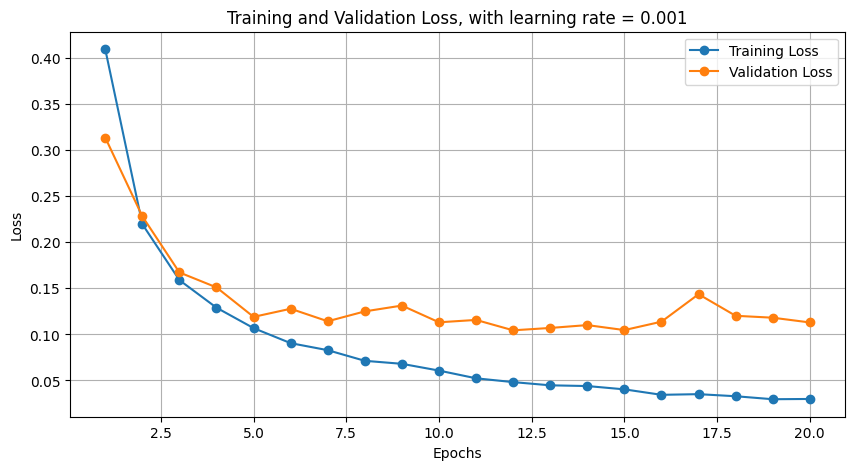

In [10]:
# Khởi tạo mạng neural
model = SimpleNN()

# Hàm loss và optimizer
lr = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Khai báo các biến để theo dõi loss trên tập train và validation
train_losses = []
validation_losses = []

# Huấn luyện mạng
n_epochs = 20
for epoch in range(n_epochs):
  model.train()
  train_loss = 0.0  # Khởi tạo loss cho epoch hiện tại
  for data, target in train_loader:
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  # Lưu loss của epoch hiện tại vào train_losses
  loss_epoch = train_loss / len(train_loader)
  train_losses.append(loss_epoch)

  # Đánh giá mô hình trên tập validation
  model.eval()
  validation_loss = 0.0
  with torch.no_grad():
    for data, target in validation_loader:
      output = model(data)
      loss = criterion(output, target)
      validation_loss += loss.item()
    loss_val_epoch = validation_loss / len(validation_loader)
    validation_losses.append(loss_val_epoch)

  print("Epoch:  ", epoch, "\t",  "Train loss: ", loss_epoch, "\t",  "Valid loss: ", loss_val_epoch)

# Vẽ loss trên tập train và tập validation
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, n_epochs + 1), validation_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss, with learning rate = {}'.format(lr))
plt.legend()
plt.grid(True)
plt.show()

### lr = 0.00001 (lr bé)

Epoch:   0 	 Train loss:  1.9269996285438538 	 Valid loss:  1.5479790099123691
Epoch:   1 	 Train loss:  1.284817771991094 	 Valid loss:  1.0811996101698977
Epoch:   2 	 Train loss:  0.9363154825369517 	 Valid loss:  0.8331410805595681
Epoch:   3 	 Train loss:  0.7459898207187653 	 Valid loss:  0.6874658864863376
Epoch:   4 	 Train loss:  0.6293296356598537 	 Valid loss:  0.5977788952753899
Epoch:   5 	 Train loss:  0.5546771656274796 	 Valid loss:  0.5367760111359839
Epoch:   6 	 Train loss:  0.5036279227733612 	 Valid loss:  0.4952826141677004
Epoch:   7 	 Train loss:  0.46667388594150544 	 Valid loss:  0.46445377313710273
Epoch:   8 	 Train loss:  0.43877536817391716 	 Valid loss:  0.4400467812380892
Epoch:   9 	 Train loss:  0.41712814273436866 	 Valid loss:  0.42185452794458006


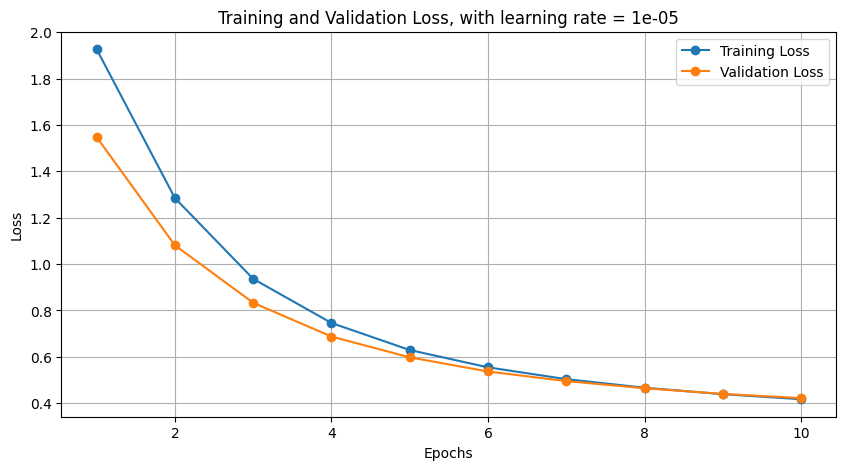

In [12]:
# Khởi tạo mạng neural
model = SimpleNN()

# Hàm loss và optimizer
lr = 0.00001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Khai báo các biến để theo dõi loss trên tập train và validation
train_losses = []
validation_losses = []

# Huấn luyện mạng
n_epochs = 10
for epoch in range(n_epochs):
  model.train()
  train_loss = 0.0  # Khởi tạo loss cho epoch hiện tại
  for data, target in train_loader:
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  # Lưu loss của epoch hiện tại vào train_losses
  loss_epoch = train_loss / len(train_loader)
  train_losses.append(loss_epoch)

  # Đánh giá mô hình trên tập validation
  model.eval()
  validation_loss = 0.0
  with torch.no_grad():
    for data, target in validation_loader:
      output = model(data)
      loss = criterion(output, target)
      validation_loss += loss.item()
    loss_val_epoch = validation_loss / len(validation_loader)
    validation_losses.append(loss_val_epoch)

  print("Epoch:  ", epoch, "\t",  "Train loss: ", loss_epoch, "\t",  "Valid loss: ", loss_val_epoch)

# Vẽ loss trên tập train và tập validation
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, n_epochs + 1), validation_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss, with learning rate = {}'.format(lr))
plt.legend()
plt.grid(True)
plt.show()

### lr = 1 (lr lớn)

Epoch:   0 	 Train loss:  122.48263713137308 	 Valid loss:  2.354697495064837
Epoch:   1 	 Train loss:  2.390156709353129 	 Valid loss:  2.3568572871228484
Epoch:   2 	 Train loss:  2.373970016161601 	 Valid loss:  2.344628468472907
Epoch:   3 	 Train loss:  2.5661466391881307 	 Valid loss:  2.3679287877488644
Epoch:   4 	 Train loss:  2.3700067046483357 	 Valid loss:  2.480184052852874
Epoch:   5 	 Train loss:  2.3725905599594115 	 Valid loss:  2.337129941646089
Epoch:   6 	 Train loss:  2.3678449700673423 	 Valid loss:  2.41548504727952
Epoch:   7 	 Train loss:  2.375498344421387 	 Valid loss:  2.379298040207396
Epoch:   8 	 Train loss:  2.3653148050308226 	 Valid loss:  2.461185370353942
Epoch:   9 	 Train loss:  2.3781914768218995 	 Valid loss:  2.3335538062643497


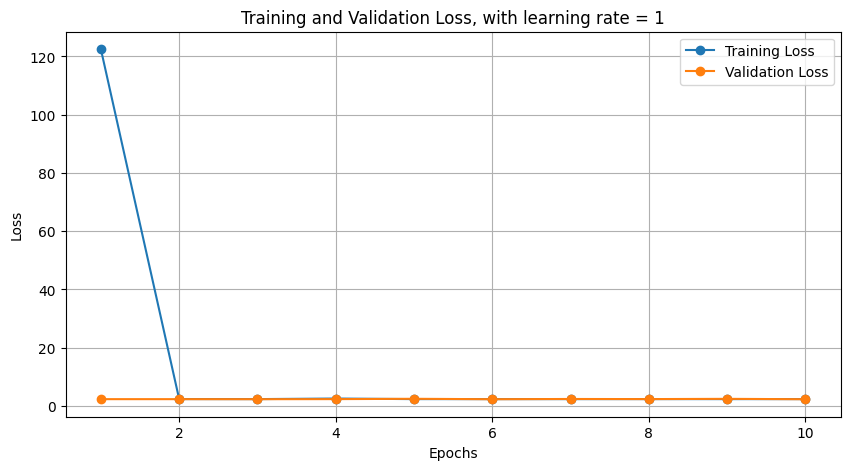

In [13]:
# Khởi tạo mạng neural
model = SimpleNN()

# Hàm loss và optimizer
lr = 1
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Khai báo các biến để theo dõi loss trên tập train và validation
train_losses = []
validation_losses = []

# Huấn luyện mạng
n_epochs = 10
for epoch in range(n_epochs):
  model.train()
  train_loss = 0.0  # Khởi tạo loss cho epoch hiện tại
  for data, target in train_loader:
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  # Lưu loss của epoch hiện tại vào train_losses
  loss_epoch = train_loss / len(train_loader)
  train_losses.append(loss_epoch)

  # Đánh giá mô hình trên tập validation
  model.eval()
  validation_loss = 0.0
  with torch.no_grad():
    for data, target in validation_loader:
      output = model(data)
      loss = criterion(output, target)
      validation_loss += loss.item()
    loss_val_epoch = validation_loss / len(validation_loader)
    validation_losses.append(loss_val_epoch)

  print("Epoch:  ", epoch, "\t",  "Train loss: ", loss_epoch, "\t",  "Valid loss: ", loss_val_epoch)

# Vẽ loss trên tập train và tập validation
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, n_epochs + 1), validation_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss, with learning rate = {}'.format(lr))
plt.legend()
plt.grid(True)
plt.show()

##  Tính các chỉ số MSE, RSME, MAE, MAPE và các chỉ số classification khác trên tập test.

In [11]:
# Đánh giá mô hình trên tập test
model.eval()
test_loss = 0.0
predictions = []
targets = []

for data, target in test_loader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()
    _, predicted = torch.max(output, 1)
    predictions.extend(predicted.numpy())
    targets.extend(target.numpy())

# Tính các chỉ số đánh giá
mse = mean_squared_error(targets, predictions)
rmse = mean_squared_error(targets, predictions, squared=False)
mae = mean_absolute_error(targets, predictions)
mape = mean_absolute_percentage_error(targets, predictions)

accuracy = accuracy_score(targets, predictions)
confusion_mat = confusion_matrix(targets, predictions)
classification_rep = classification_report(targets, predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion_mat)
print("Classification report: \n", classification_rep)


MSE: 0.4822
RMSE: 0.6944062211702888
MAE: 0.0976
MAPE: 21617278211378.402
Accuracy:  0.9744
Confusion matrix: 
 [[ 970    0    3    0    1    2    1    2    1    0]
 [   0 1123    5    1    0    1    1    1    3    0]
 [   1    0 1013    0    5    0    1   10    2    0]
 [   0    0    8  981    0    8    0    2    4    7]
 [   3    0    6    1  946    0    2    7    0   17]
 [   3    0    0    5    0  871    4    1    2    6]
 [  11    4    4    0    4    6  923    2    4    0]
 [   1    1    5    2    0    0    0 1013    1    5]
 [   7    1    9    6    1    4    0    5  939    2]
 [   2    2    0    7    7    4    0   15    7  965]]
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.96      0.97       982
       

# Bài 3:
Tại sao hàm softmax lại dùng exponential function (e) mà không phải số khác như 2, 3 hoặc 4


- Do e được dùng nhiều trong các hàm tăng trưởng (exponential growth) -> thuận tiện trong việc sử dụng và công nhận rộng rãi.
- Cơ số e giúp tính đạo hàm dễ dàng và cho kết quả đẹp hơn. Trong backpropagation cần chain rule, thì việc đạo hàm dễ dàng hơn là cần thiết.
- Thuận tiện biểu diễn cho dạng xác suất